##### Copyright 2018 The TensorFlow Authors.

In [14]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

## Setup

Import TensorFlow and other necessary libraries:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import os

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

## Download and explore the dataset

In [2]:
import pathlib

#dataset_url = "C:/Users/karo1/OneDrive/Documentos/Curso_CC/IA/G2/Trabalho G2/train.zip"
data_dir = "C:/Users/karo1/OneDrive/Documentos/Curso_CC/IA/G2/Trabalho G2/train/train"
#tf.keras.utils.get_file('flower_photos.tar', origin=dataset_url, extract=True)
data_dir = pathlib.Path(data_dir).with_suffix('')

In [3]:
image_count1 = len(list(data_dir.glob('*cats*.jpg')))
image_count2 = len(list(data_dir.glob('*lion*.jpg')))
print(image_count1)
print(image_count2)

500
489


In [4]:

from sklearn.model_selection import train_test_split
import shutil
# Create directories for training and validation splits
base_dir = 'C:/Users/karo1/OneDrive/Documentos/Curso_CC/IA/G2/Trabalho G2/cats_and_lion_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
os.makedirs(train_dir, exist_ok=True)
os.makedirs(validation_dir, exist_ok=True)

# Create subdirectories for train and validation
train_cats_dir = os.path.join(train_dir, 'cats')
train_lion_dir = os.path.join(train_dir, 'lion')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_lion_dir = os.path.join(validation_dir, 'lion')
os.makedirs(train_cats_dir, exist_ok=True)
os.makedirs(train_lion_dir, exist_ok=True)
os.makedirs(validation_cats_dir, exist_ok=True)
os.makedirs(validation_lion_dir, exist_ok=True)

# Define the paths to the original training data
# Double-check this path to ensure it's where your training data is located
original_train_dir = 'C:/Users/karo1/OneDrive/Documentos/Curso_CC/IA/G2/Trabalho G2/train/train'

# Verify if the directory exists and print its contents for inspection
if os.path.exists(original_train_dir):
    print("Original training directory found. Contents:")
    print(os.listdir(original_train_dir))  # Print contents to check file names
else:
    print("Error: Original training directory not found. Please check the path.")

# Split the dataset into training and validation sets
# Adjust the file name patterns if necessary based on the actual file names
all_cats = [os.path.join(original_train_dir, f) for f in os.listdir(original_train_dir) if 'cat' in f.lower()]  # Case-insensitive search
all_lion = [os.path.join(original_train_dir, f) for f in os.listdir(original_train_dir) if 'lion' in f.lower()]  # Case-insensitive search

print(len(all_cats))
print(len(all_lion)) # Print the number of lion images as well

# Proceed with splitting if files are found
if all_cats and all_lion:
    train_cats, val_cats = train_test_split(all_cats, test_size=0.2, random_state=42)
    train_lion, val_lion = train_test_split(all_lion, test_size=0.2, random_state=42)

    # Copy images to corresponding directories
    for file in train_cats:
        shutil.copy(file, train_cats_dir)
    for file in val_cats:
        shutil.copy(file, validation_cats_dir)
    for file in train_lion:
        shutil.copy(file, train_lion_dir)
    for file in val_lion:
        shutil.copy(file, validation_lion_dir)
else:
    print("No cat or lion images found. Please check file names and directory path.")

Original training directory found. Contents:
['cats.1.jpg', 'cats.10.jpg', 'cats.100.jpg', 'cats.101.jpg', 'cats.102.jpg', 'cats.103.jpg', 'cats.104.jpg', 'cats.105.jpg', 'cats.106.jpg', 'cats.107.jpg', 'cats.108.jpg', 'cats.109.jpg', 'cats.11.jpg', 'cats.110.jpg', 'cats.111.jpg', 'cats.112.jpg', 'cats.113.jpg', 'cats.114.jpg', 'cats.115.jpg', 'cats.116.jpg', 'cats.117.jpg', 'cats.118.jpg', 'cats.119.jpg', 'cats.12.jpg', 'cats.120.jpg', 'cats.121.jpg', 'cats.122.jpg', 'cats.123.jpg', 'cats.124.jpg', 'cats.125.jpg', 'cats.126.jpg', 'cats.127.jpg', 'cats.128.jpg', 'cats.129.jpg', 'cats.13.jpg', 'cats.130.jpg', 'cats.131.jpg', 'cats.132.jpg', 'cats.133.jpg', 'cats.134.jpg', 'cats.135.jpg', 'cats.136.jpg', 'cats.137.jpg', 'cats.138.jpg', 'cats.139.jpg', 'cats.14.jpg', 'cats.140.jpg', 'cats.141.jpg', 'cats.142.jpg', 'cats.143.jpg', 'cats.144.jpg', 'cats.145.jpg', 'cats.146.jpg', 'cats.147.jpg', 'cats.148.jpg', 'cats.149.jpg', 'cats.15.jpg', 'cats.150.jpg', 'cats.151.jpg', 'cats.152.jpg', 'c

### Create a dataset

In [5]:
batch_size = 32
img_height = 180
img_width = 180

In [6]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  train_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 800 files belonging to 2 classes.
Using 640 files for training.


In [7]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  validation_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 200 files belonging to 2 classes.
Using 40 files for validation.


In [8]:
class_names = train_ds.class_names
print(class_names)

['cats', 'lion']


## Visualize the data

Here are the first nine images from the training dataset:

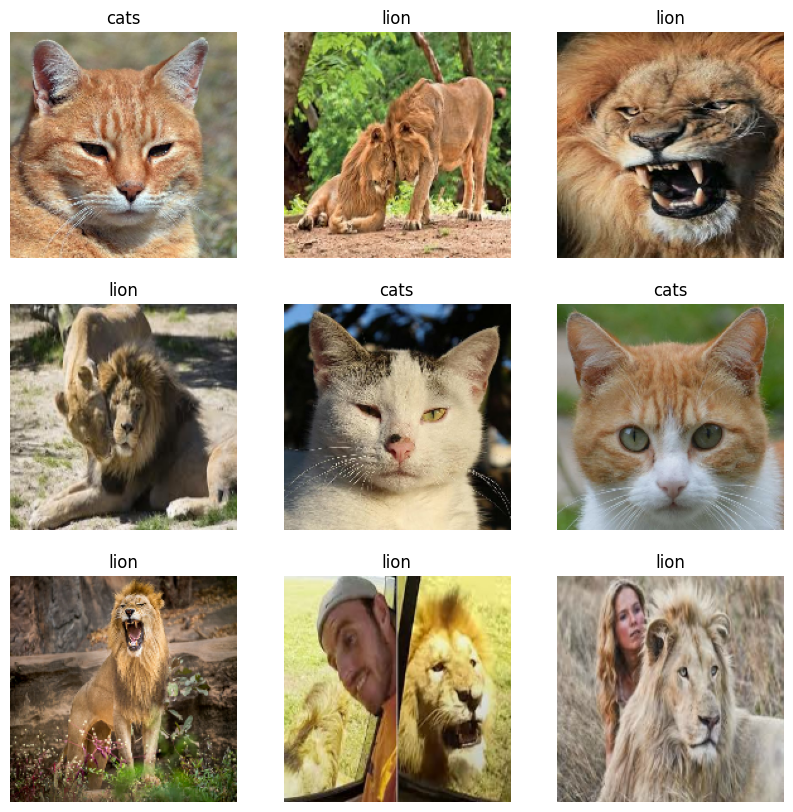

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

You will pass these datasets to the Keras `Model.fit` method for training later in this tutorial. If you like, you can also manually iterate over the dataset and retrieve batches of images:

In [10]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


## Configure the dataset for performance

In [11]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

## Standardize the data

In [12]:
normalization_layer = layers.Rescaling(1./255)

In [14]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 0.9637859


## A basic Keras model

### Create the model

In [15]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

C:\Users\karo1\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:18: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Compile the model

In [20]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Model summary


In [43]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 180, 180, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 90, 90, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,988,898 (15.22 MB)

 Trainable params: 3,988,898 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

### Train the model

Train the model for 10 epochs with the Keras `Model.fit` method:

In [44]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10


20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 364ms/step - accuracy: 0.5951 - loss: 0.7364 - val_accuracy: 0.6000 - val_loss: 0.6181
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 349ms/step - accuracy: 0.8312 - loss: 0.4026 - val_accuracy: 0.9250 - val_loss: 0.1763
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 332ms/step - accuracy: 0.9614 - loss: 0.1213 - val_accuracy: 0.9750 - val_loss: 0.0783
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 330ms/step - accuracy: 0.9844 - loss: 0.0560 - val_accuracy: 0.9750 - val_loss: 0.0574
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 332ms/step - accuracy: 0.9872 - loss: 0.0436 - val_accuracy: 1.0000 - val_loss: 0.0212
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 333ms/step - accuracy: 0.9946 - loss: 0.0197 - val_accuracy: 0.9750 - val_loss: 0.1314
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 333ms/step - accuracy: 1.0000 - loss: 0.0054 - val_accuracy: 0.9500 - val_loss: 0.0596
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 330ms/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 0.9750 - val

## Visualize training results

Create plots of the loss and accuracy on the training and validation sets:

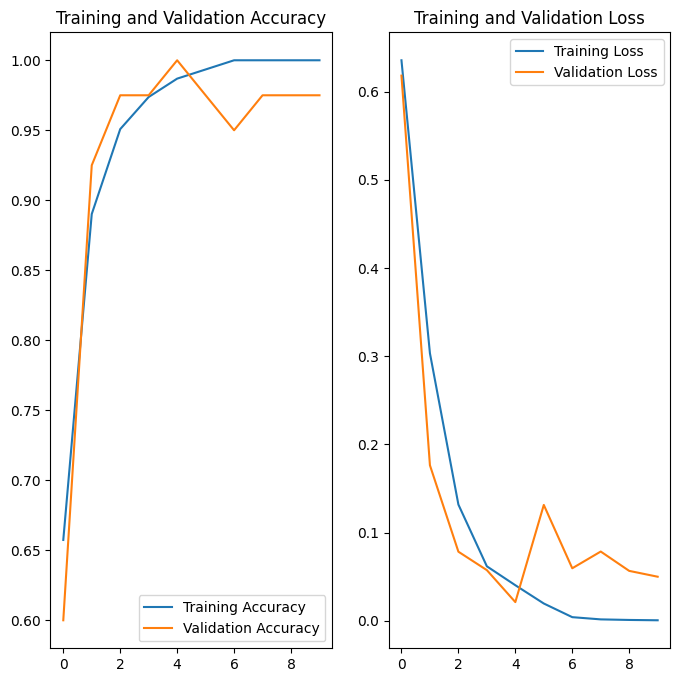

In [45]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Data augmentation

Overfitting generally occurs when there are a small number of training examples. [Data augmentation](./data_augmentation.ipynb) takes the approach of generating additional training data from your existing examples by augmenting them using random transformations that yield believable-looking images. This helps expose the model to more aspects of the data and generalize better.

You will implement data augmentation using the following Keras preprocessing layers: `tf.keras.layers.RandomFlip`, `tf.keras.layers.RandomRotation`, and `tf.keras.layers.RandomZoom`. These can be included inside your model like other layers, and run on the GPU.

In [46]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

Visualize a few augmented examples by applying data augmentation to the same image several times:

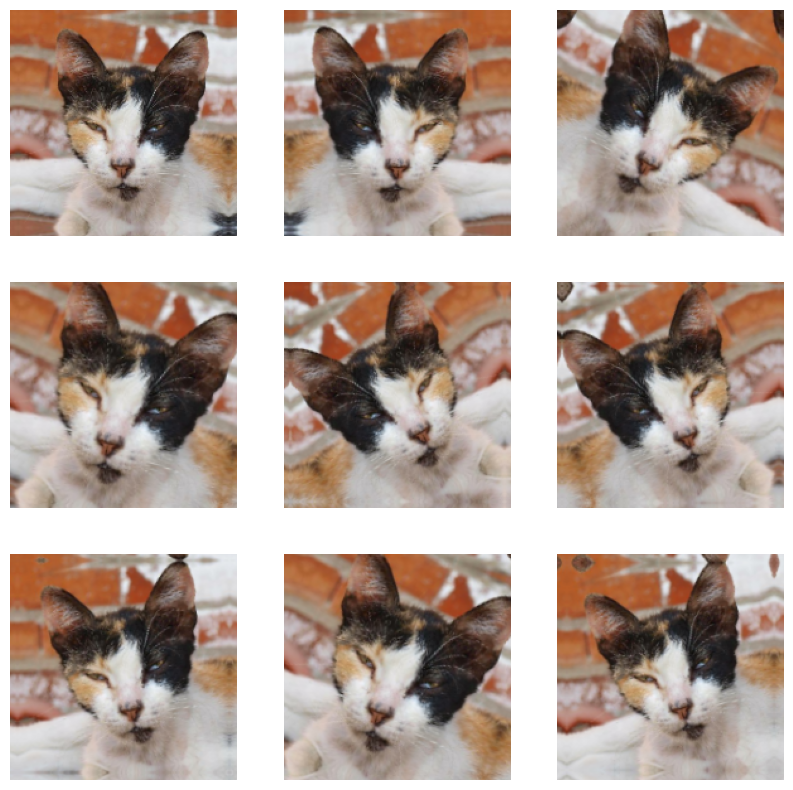

In [47]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

You will add data augmentation to your model before training in the next step.

## Dropout

In [48]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

## Compile and train the model

In [49]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [50]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)       │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_2 (Rescaling)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ outputs (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [51]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 392ms/step - accuracy: 0.5495 - loss: 0.8117 - val_accuracy: 0.7750 - val_loss: 0.5116
Epoch 2/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 379ms/step - accuracy: 0.7793 - loss: 0.5123 - val_accuracy: 0.8250 - val_loss: 0.4131
Epoch 3/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 400ms/step - accuracy: 0.8144 - loss: 0.4222 - val_accuracy: 0.8750 - val_loss: 0.3502
Epoch 4/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 388ms/step - accuracy: 0.8743 - loss: 0.3160 - val_accuracy: 0.9250 - val_loss: 0.3513
Epoch 5/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 373ms/step - accuracy: 0.8640 - loss: 0.3327 - val_accuracy: 0.9250 - val_loss: 0.2316
Epoch 6/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 357ms/step - accuracy: 0.8971 - loss: 0.2715 - val_accuracy: 0.9250 - val_loss: 0.2102
Epoch 7/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 356ms/step - accuracy: 0.8913 - loss: 0.2685 - val_accuracy: 0.9250 - val_loss: 0.2378
Epoch 8/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 353ms/step - accuracy: 0.9062 - loss: 0.2335 - val_accuracy: 0

## Visualize training results

After applying data augmentation and `tf.keras.layers.Dropout`, there is less overfitting than before, and training and validation accuracy are closer aligned:

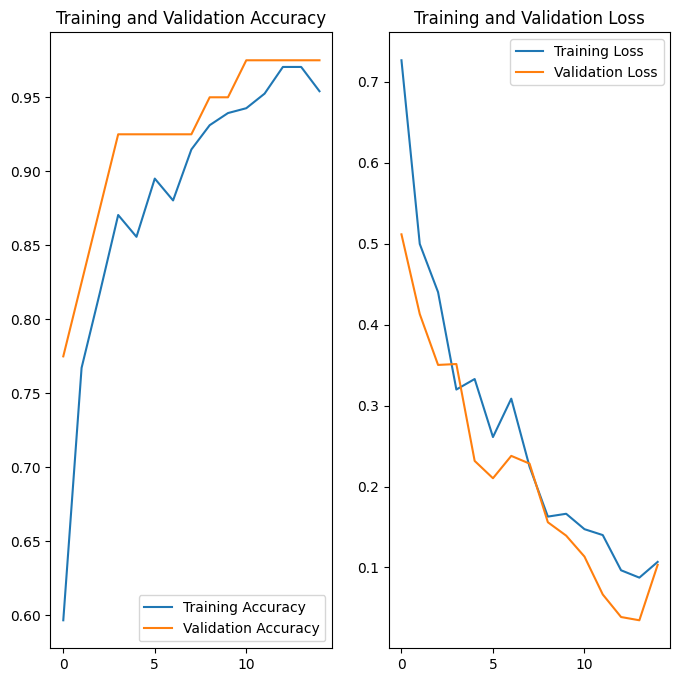

In [52]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Predict on new data

Use your model to classify an image that wasn't included in the training or validation sets.

Note: Data augmentation and dropout layers are inactive at inference time.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step
This image most likely belongs to cats with a 52.78 percent confidence.
[[ 0.06239971 -0.04910699]]
tf.Tensor([0.5278478  0.47215214], shape=(2,), dtype=float32)


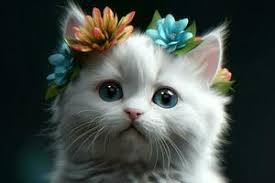

In [16]:
sunflower_url = "images (1).jpg"
#sunflower_path = tf.keras.utils.get_file('lion_image', origin=sunflower_url)

img = tf.keras.utils.load_img(
    sunflower_url, target_size=(180, 180)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)
print(predictions)
print(score)
PIL.Image.open(sunflower_url)